In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# 总结
1. 模型的使用范围,且权重是在调用是创建（参考第一部分的2个模型图）
2. 工作流程：add()+summary()
3. 用途：特征抽取+迁移学习




# 何时使用Sequential model
一个Sequential模型适用于简单的层堆栈， 其中每一层都有一个输入张量和一个输出张量。

顺序模型不适用于以下情况：

- 模型有多个输入或多个输出
- 任何一层都有多个输入或多个输出
- 需要进行图层共享
- 需要非线性拓扑（例如，惨差连接，多分支模型）

> 注意：每层dense输出的units对应的是神经元个数

In [7]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)


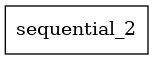

In [8]:
keras.utils.plot_model(model, "../../learnMLData/img/sequential_model_1.png", show_shapes=True)

In [9]:
# Call model on a test input
x = tf.ones((3, 3))

#x = tf.random.normal(shape=(3,3))
y = model(x)

# 情况等效

# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y2 = layer3(layer2(layer1(x)))

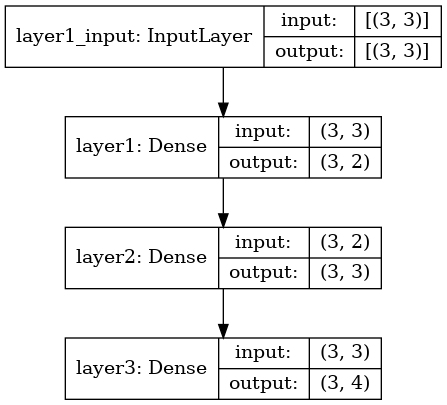

In [10]:
keras.utils.plot_model(model, "../../learnMLData/img/sequential_model_1.png", show_shapes=True)

In [ ]:
# Call model on a test input
x = tf.ones((3, 3))

#x = tf.random.normal(shape=(3,3))
y = model(x)

# 情况等效

# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y2 = layer3(layer2(layer1(x)))

# 创建一个Sequential model
## 传递图层创建
将图层列表传递给Sequential构造函数来创建Sequential模型

可以通过layes访问其图层

In [4]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

model.layers

## add函数创建

请注意，还有一种相应的pop()方法可以删除图层：顺序模型的行为非常类似于图层列表。

In [5]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

model.pop()
print(len(model.layers))  # 2

2


还要注意，name就像Keras中的任何层或模型一样，Sequential构造函数接受一个参数。这对于用语义上有意义的名称注释TensorBoard图很有用。




In [6]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

# 预先指定输入形状(调用创建权重)
通常，Keras中的所有图层都需要知道其输入的形状，以便能够创建其权重。因此，**当创建这样的图层时，最初没有权重**

**<font color = red>首次调用时，创建权重，同理，Sequential Model也是调用时创建权重</front>**

In [7]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

In [8]:
# Call layer on a test input
x = tf.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_6/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.29447556, -0.71904033, -0.86365294],
        [ 0.14365435,  0.44583237, -0.0153904 ],
        [-0.69769084, -0.5952797 ,  0.5448953 ],
        [-0.55644023,  0.30582273,  0.7273247 ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [11]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

model.summary()

Number of weights after calling the model: 6
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 2)                    10        
_________________________________________________________________
dense_1 (Dense)              (1, 3)                    9         
_________________________________________________________________
dense_2 (Dense)              (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


以上示例是全部构建完模型后再初始化，以创建参数。但是，逐步构建时显示最新的summary信息非常主要，包括以下几个方法
- **通过将一个Input 对象传递给模型来启动模型，以使它从一开始就知道其输入形状**

In [10]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


- **一个简单的替代方法是将input_shape参数传递给第一层**

In [11]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


# 常见的调试工作流程：add() + summary()

卷积核输出空间计算：floor((W - F + 2P)/S + 1),其中W为输入数据如5×5，W=5，F为卷积核大小，3×3，F=3，P表示边界填充0的数量，S为步长

In [12]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.summary()
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
____

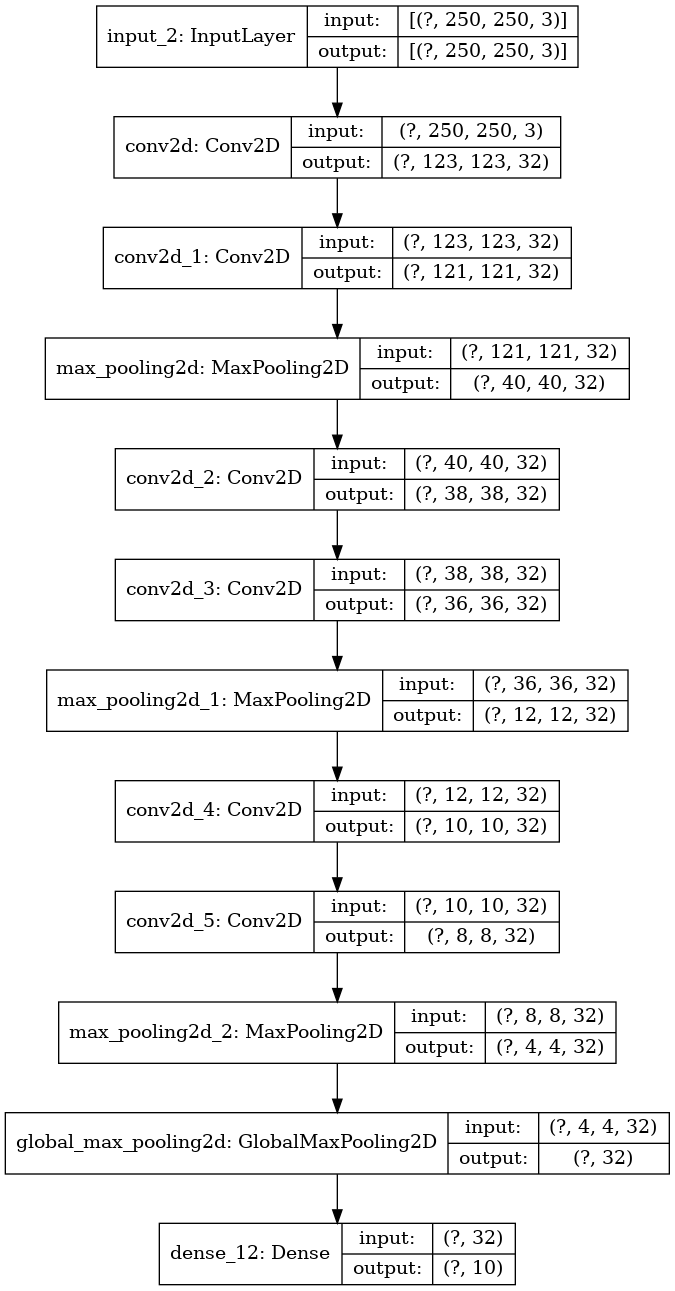

In [13]:
keras.utils.plot_model(model, "../../learnMLData/multi_input_and_output_model.png", show_shapes=True)

In [43]:
tf.zeros(shape=(4, 4, 3))

<tf.Tensor: shape=(4, 4, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

# Feature extraction with a Sequential model

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "0"  #选择哪一块gpu
config = ConfigProto()
config.allow_soft_placement=True #如果你指定的设备不存在，允许TF自动分配设备
config.gpu_options.per_process_gpu_memory_fraction=0.7  #分配百分之七十的显存给程序使用，避免内存溢出，可以自己调整
config.gpu_options.allow_growth = True   #按需分配显存，这个比较重要
session = InteractiveSession(config=config)


In [3]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
initial_model.summary()
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 32)      9248      
Total params: 20,928
Trainable params: 20,928
Non-trainable params: 0
_________________________________________________________________


In [4]:
[layer.output for layer in initial_model.layers]

[<tf.Tensor 'conv2d/Relu:0' shape=(None, 123, 123, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(None, 121, 121, 32) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 119, 119, 32) dtype=float32>]

# 使用顺序模型迁移学习
转移学习包括冻结模型中的底层并仅训练顶层。如果您不熟悉它，请务必阅读我们的迁移学习指南。

这是涉及顺序模型的两个常见的迁移学习蓝图。

首先，假设您有一个顺序模型，并且要冻结除最后一层之外的所有层。在这种情况下，您只需遍历 model.layers并设置layer.trainable = False除最后一层以外的每一层

In [ ]:
# 示例，无法运行
model = keras.Sequential([
    keras.Input(shape=(784)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10),
])

# Presumably you would want to first load pre-trained weights.
model.load_weights(...)

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)

In [ ]:
# Load a convolutional base with pre-trained weights
base_model = keras.applications.Xception(
    weights='imagenet',
    include_top=False,
    pooling='avg')

# Freeze the base model
base_model.trainable = False

# Use a Sequential model to add a trainable classifier on top
model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])

# Compile & train
model.compile(...)
model.fit(...)